### Julian Ferres

#### Importo todas las librerias e inicializo funciones

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos, pi
from scipy.stats import truncnorm

m1 = lambda x: (x+2)**2/2
m2 = lambda x: x/2 + 0.875
m3 = lambda x: -5*(x-0.2)**2 + 1.075
m4 = lambda x: x + 0.125

def m(x):
    if -1 <= x <= -0.5:
        return m1(x)
    if -0.5 <= x < 0:
        return m2(x)
    if 0 < x <= 0.5:
        return m3(x)
    if 0.5 < x <= 1:
        return m4(x)

m = np.vectorize(m)

x_0 = np.linspace(-1,1,1000) #Me genero 1000 valores entre -1 y 1 para graficar m(x) 'suave'
y_0 = m(x_0)

-  Primera interpretación con Normal truncada (sin reescalar para que sea función de densidad)

In [179]:
x = [np.random.normal(0,1) for i in range(5000)]
x = list(filter(lambda x: -1 <= x <= 1, x))[:200] #Me quedo solo con 200

In [180]:
sigma = np.vectorize(lambda x : 0.2 - 0.1 * cos(2*pi*x))
normal = np.vectorize(np.random.normal)

y = normal (m(x),sigma(x))

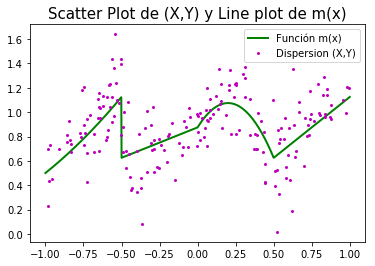

In [181]:
plt.plot(x_0 , y_0 , 'g-' , linewidth = 2 , label = 'Función m(x)' )
plt.legend(loc='best', frameon= True)

plt.plot(x,y, "mo", markersize=2 , label = 'Dispersion (X,Y)')
plt.legend(loc='best', frameon= True)

plt.title("Scatter Plot de (X,Y) y Line plot de m(x)",fontsize='15')
plt.show()

-  Segunda interpretación de Normal truncada (reescalando para que sea función de densidad)

In [182]:
a , b = -1 , 1 #Limites de la normal truncada

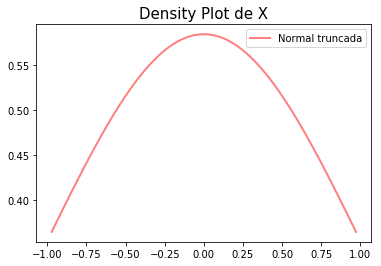

In [183]:
x1 = np.linspace(truncnorm.ppf(0.01, a, b),
                truncnorm.ppf(0.99, a, b), 100)
plt.plot(x1, truncnorm.pdf(x1, a, b),
        'r-', lw=2, alpha=0.5, label='Normal truncada')
plt.title("Density Plot de X",fontsize='15')
plt.legend(loc='best', frameon= True)

In [184]:
r = truncnorm.rvs(a, b, size=200)
r = list(r)

In [185]:
sigma = np.vectorize(lambda x : 0.2 - 0.1 * cos(2*pi*x))
normal = np.vectorize(np.random.normal)

y1 = normal (m(x1),sigma(x1))

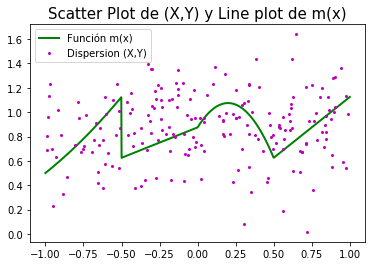

In [186]:
plt.plot(x_0 , y_0 , 'g-' , linewidth = 2 , label = 'Función m(x)' )
plt.legend(loc='best', frameon= True)

plt.plot(r,y, "mo", markersize=2 , label = 'Dispersion (X,Y)')
plt.legend(loc='best', frameon= True)

plt.title("Scatter Plot de (X,Y) y Line plot de m(x)" ,fontsize='15')

plt.show()

Link al Repo de GitHub: https://github.com/julianferres/Aprendizaje-Estadistico.git